<a href="https://colab.research.google.com/github/Borwec/ida_25_26/blob/main/lab2/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.image as mpimg
import urllib
import re
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.svm import SVC

In [100]:
#https://www.kaggle.com/datasets/gorororororo23/plant-growth-data-classification

url = "https://drive.google.com/uc?id=1q96dh1Kdr8DI9nnLsDLntzvdurA2gOA3"
df = pd.read_csv(url)

In [101]:
df.shape

(193, 7)

In [102]:
df.head()

Soil_Type  Sunlight_Hours Water_Frequency Fertilizer_Type  Temperature  \
0      loam        5.192294       bi-weekly        chemical    31.719602   
1     sandy        4.033133          weekly         organic    28.919484   
2      loam        8.892769       bi-weekly            none    23.179059   
3      loam        8.241144       bi-weekly            none    18.465886   
4     sandy        8.374043       bi-weekly         organic    18.128741   

    Humidity  Growth_Milestone  
0  61.591861                 0  
1  52.422276                 1  
2  44.660539                 0  
3  46.433227                 0  
4  63.625923                 0

In [103]:
df.isnull().sum()

Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64

In [104]:
ohe_cols = ["Soil_Type", "Water_Frequency", "Fertilizer_Type"]
mms_cols = ["Sunlight_Hours", "Temperature", "Humidity"]

In [105]:
ohe = OneHotEncoder(sparse_output=False)
ohe_ft = ohe.fit_transform(df[ohe_cols])
ohe_df = pd.DataFrame(ohe_ft, columns=ohe.get_feature_names_out(ohe_cols))
df_intermediate = pd.concat([ohe_df, df.drop(columns=ohe_cols)], axis=1)
df_intermediate.head()

Soil_Type_clay  Soil_Type_loam  Soil_Type_sandy  Water_Frequency_bi-weekly  \
0             0.0             1.0              0.0                        1.0   
1             0.0             0.0              1.0                        0.0   
2             0.0             1.0              0.0                        1.0   
3             0.0             1.0              0.0                        1.0   
4             0.0             0.0              1.0                        1.0   

   Water_Frequency_daily  Water_Frequency_weekly  Fertilizer_Type_chemical  \
0                    0.0                     0.0                       1.0   
1                    0.0                     1.0                       0.0   
2                    0.0                     0.0                       0.0   
3                    0.0                     0.0                       0.0   
4                    0.0                     0.0                       0.0   

   Fertilizer_Type_none  Fertilizer_Type_organic  Sunlight_Hours  Temperature  \
0                   0.0                      0.0        5.192294    31.719602   
1                   0.0                      1.0        4.033133    28.919484   
2                   1.0                      0.0        8.892769    23.179059   
3                   1.0                      0.0        8.241144    18.465886   
4                   0.0                      1.0        8.374043    18.128741   

    Humidity  Growth_Milestone  
0  61.591861                 0  
1  52.422276                 1  
2  44.660539                 0  
3  46.433227                 0  
4  63.625923                 0

In [106]:
X = df_intermediate.drop(columns=["Growth_Milestone"])
y = df_intermediate["Growth_Milestone"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 127)

In [107]:
mms = MinMaxScaler()
mms.fit(X_train)

mms_X_train = mms.transform(X_train)
mms_X_test = mms.transform(X_test)

SVC with GridSearch and AdaBoost on default data

In [108]:
params = {"C": [10 ** x for x in range(-5, 6)], "gamma": [10 ** -x for x in range(0, 6)]}
grid = GridSearchCV(SVC(), params, cv=5, n_jobs=-1)

grid.fit(mms_X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [109]:
pred = grid.predict(mms_X_test)

print(classification_report(y_test,pred))
print()
print(confusion_matrix(y_test,pred))
print()
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.62      0.71        26
           1       0.67      0.87      0.75        23

    accuracy                           0.73        49
   macro avg       0.75      0.74      0.73        49
weighted avg       0.76      0.73      0.73        49


[[16 10]
 [ 3 20]]

0.7346938775510204


In [110]:
ab = AdaBoostClassifier(random_state = 127)
ab.fit(X_train, y_train)
pred = ab.predict(X_test)

print(classification_report(y_test,pred))
print()
print(confusion_matrix(y_test,pred))
print()
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68        26
           1       0.64      0.70      0.67        23

    accuracy                           0.67        49
   macro avg       0.67      0.67      0.67        49
weighted avg       0.68      0.67      0.67        49


[[17  9]
 [ 7 16]]

0.673469387755102


In [111]:
mms = MinMaxScaler()
mms_X = mms.fit_transform(X)

In [112]:
pca = PCA(n_components=2, random_state=127)
pca_X = pca.fit_transform(mms_X)

tsne = TSNE(n_components=2, random_state=127, perplexity=15, n_jobs=-1)
tsne_X = tsne.fit_transform(mms_X)

In [113]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_X, y, test_size=0.25, random_state = 127)
tsne_X_train, tsne_X_test, tsne_y_train, tsne_y_test = train_test_split(tsne_X, y, test_size=0.25, random_state = 127)

SVC with GridSearch and AdaBoost after PCA

In [114]:
params = {"C": [10 ** x for x in range(-5, 6)], "gamma": [10 ** -x for x in range(0, 6)]}
grid = GridSearchCV(SVC(), params, cv=5, n_jobs=-1)

grid.fit(pca_X_train, pca_y_train)
grid.best_params_

{'C': 1000, 'gamma': 1}

In [115]:
pred = grid.predict(pca_X_test)

print(classification_report(pca_y_test,pred))
print()
print(confusion_matrix(pca_y_test,pred))
print()
print(accuracy_score(pca_y_test,pred))

              precision    recall  f1-score   support

           0       0.61      0.54      0.57        26
           1       0.54      0.61      0.57        23

    accuracy                           0.57        49
   macro avg       0.57      0.57      0.57        49
weighted avg       0.58      0.57      0.57        49


[[14 12]
 [ 9 14]]

0.5714285714285714


In [116]:
ab = AdaBoostClassifier(random_state = 127)
ab.fit(pca_X_train, pca_y_train)
pred = ab.predict(pca_X_test)

print(classification_report(pca_y_test,pred))
print()
print(confusion_matrix(pca_y_test,pred))
print()
print(accuracy_score(pca_y_test,pred))

              precision    recall  f1-score   support

           0       0.57      0.50      0.53        26
           1       0.50      0.57      0.53        23

    accuracy                           0.53        49
   macro avg       0.53      0.53      0.53        49
weighted avg       0.53      0.53      0.53        49


[[13 13]
 [10 13]]

0.5306122448979592


SVC with GridSearch and AdaBoost after TSNE

In [117]:
params = {"C": [10 ** x for x in range(-5, 6)], "gamma": [10 ** -x for x in range(0, 6)]}
grid = GridSearchCV(SVC(), params, cv=5, n_jobs=-1)

grid.fit(tsne_X_train, tsne_y_train)
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [118]:
pred = grid.predict(tsne_X_test)

print(classification_report(tsne_y_test,pred))
print()
print(confusion_matrix(tsne_y_test,pred))
print()
print(accuracy_score(tsne_y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.50      0.59        26
           1       0.58      0.78      0.67        23

    accuracy                           0.63        49
   macro avg       0.65      0.64      0.63        49
weighted avg       0.66      0.63      0.63        49


[[13 13]
 [ 5 18]]

0.6326530612244898


In [119]:
ab = AdaBoostClassifier(random_state = 127)
ab.fit(tsne_X_train, tsne_y_train)
pred = ab.predict(tsne_X_test)

print(classification_report(tsne_y_test,pred))
print()
print(confusion_matrix(tsne_y_test,pred))
print()
print(accuracy_score(tsne_y_test,pred))

              precision    recall  f1-score   support

           0       0.61      0.54      0.57        26
           1       0.54      0.61      0.57        23

    accuracy                           0.57        49
   macro avg       0.57      0.57      0.57        49
weighted avg       0.58      0.57      0.57        49


[[14 12]
 [ 9 14]]

0.5714285714285714


Image color quantization with k-means clustering

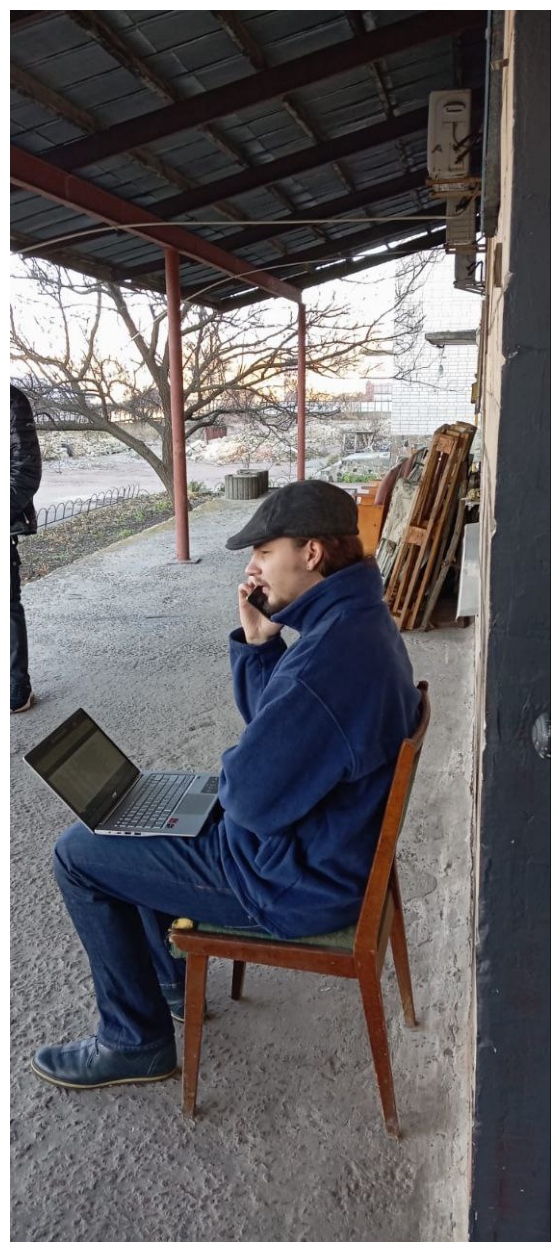

In [120]:
im_url = "https://drive.google.com/uc?id=13tmdK3DTKNeo-SPdIs0PEERBSsEO4Uiq"
urllib.request.urlretrieve(im_url, "f")
img = mpimg.imread("f")
img = img[:, :, :3]
plt.figure(figsize=(7, 16), dpi=100)
plt.imshow(img)
plt.axis("off")
plt.show()

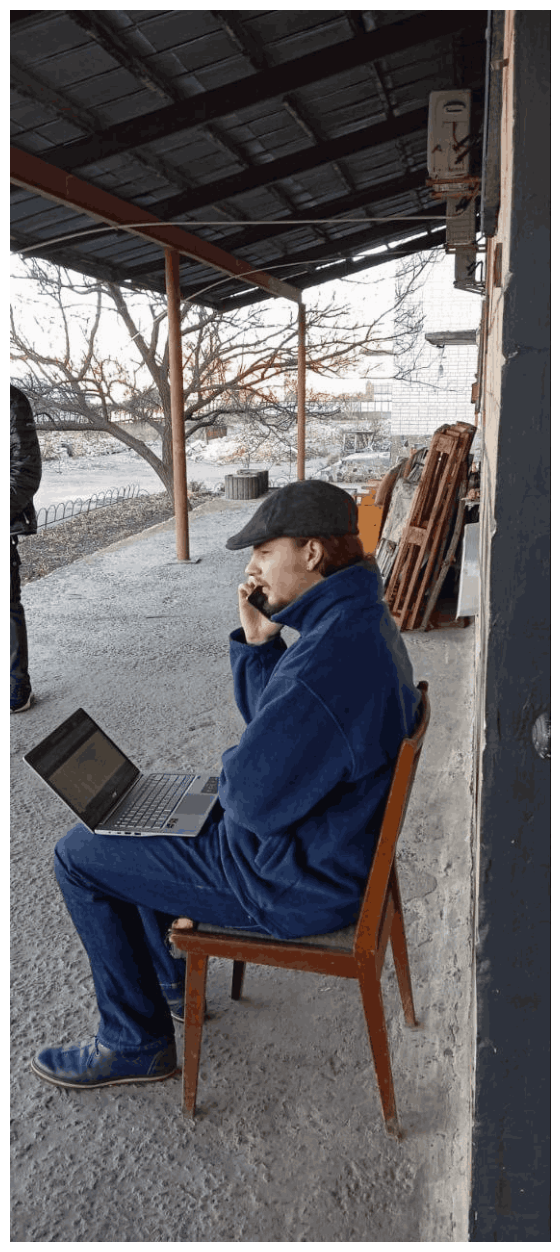

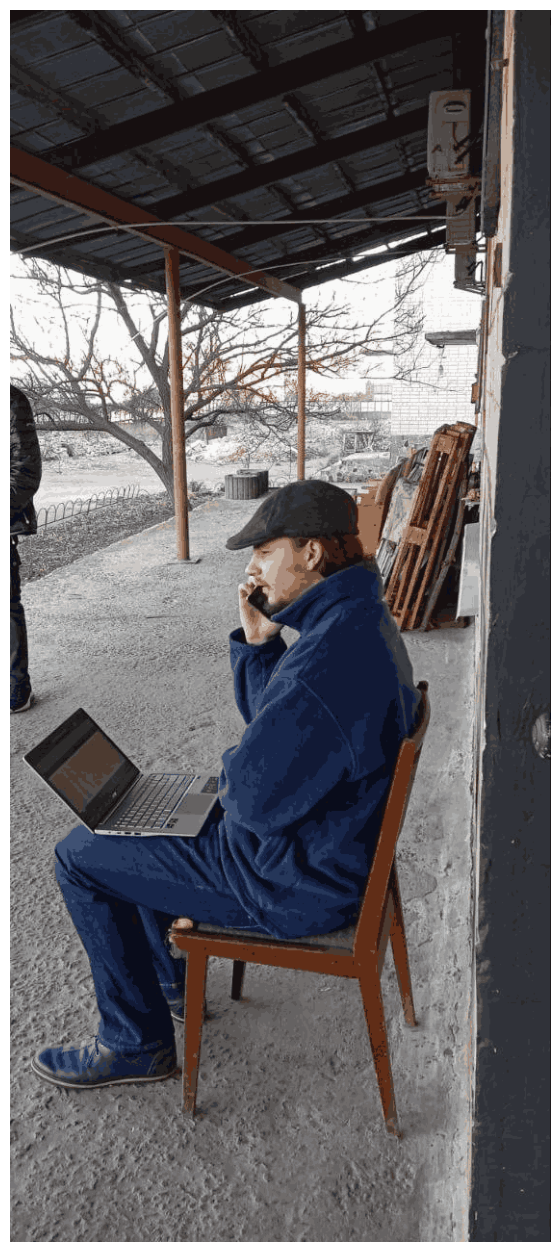

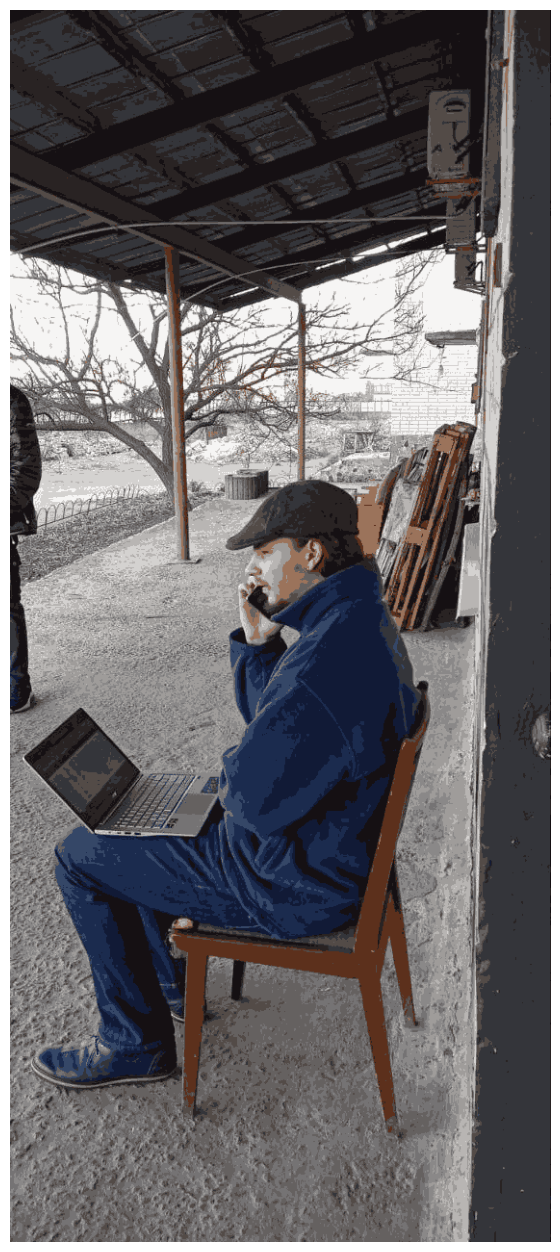

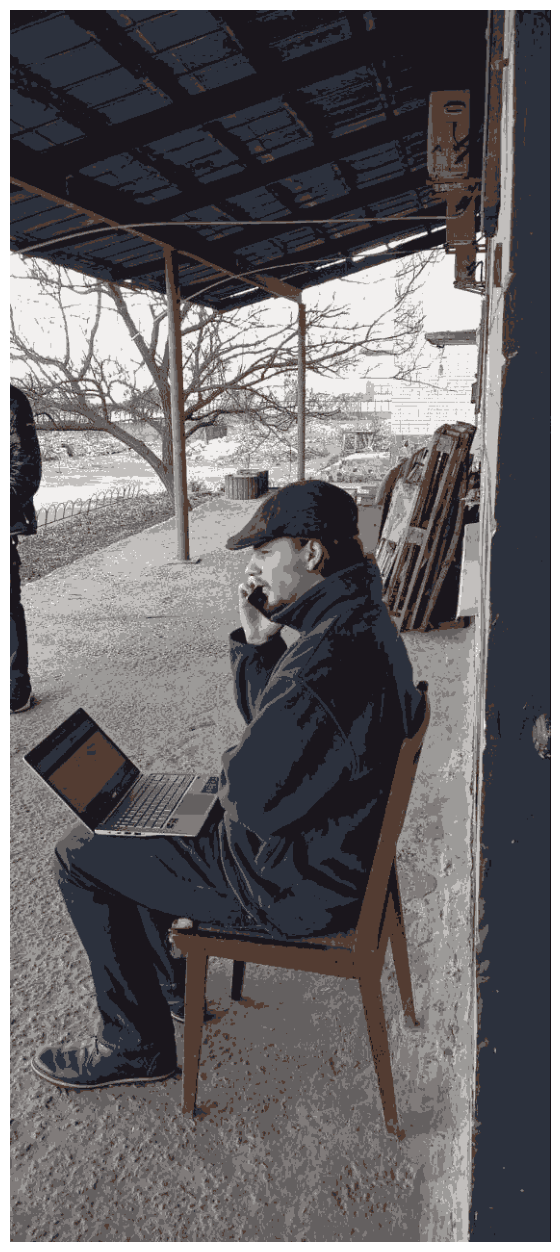

In [121]:
data = img / 255.0
pixels = data.reshape(-1, 3)

n_colors = [2 ** x for x in range(3, 7)]
n_colors.reverse()
for k in n_colors:
  kmeans = KMeans(n_clusters=k, n_init=5, random_state=127)
  kmeans.fit(pixels)

  k_col = kmeans.cluster_centers_[kmeans.labels_]
  k_col_img = k_col.reshape(img.shape)

  plt.figure(figsize=(7, 16), dpi=100)
  plt.imshow(k_col_img * 255.0)
  plt.axis("off")
  plt.show()

In [122]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [123]:
#https://www.kaggle.com/datasets/sayankr007/cyber-bullying-data-for-multi-label-classification

ds_url = "https://drive.google.com/uc?id=1ayAK_Z3ZJOq2Fqp9ATyt694ha9iJ1sYM"
df = pd.read_csv(ds_url)
df = df[["comment", "label"]]
df.head()

comment       label
0                     0 u0 lmao wow fuck you too 😂 😂      normal
1  1 0 th floor maybe wow cnn with the fakenews t...   offensive
2  1 0 yrs <number> white women raped by niggers ...  hatespeech
3  1 2 h ago ching chong accepted your friend req...   offensive
4  1 8 th century mayhem and lawlessness had noth...      normal

In [124]:
def prep_text(text):
  text = text.lower()
  text = re.sub(r"<.*?>", " ", text)
  text = re.sub(r"[^a-zA-Z]", " ", text)
  text = re.sub(r"\s{2,}", " ", text)
  text = ' '.join([word for word in text.split(" ") if word not in stop_words])
  return text

for i in range(len(df["comment"])):
  df.loc[i, "comment"] = prep_text(df["comment"][i])

df.head()

comment       label
0                                   u lmao wow fuck       normal
1   th floor maybe wow cnn fakenews body count go...   offensive
2   yrs white women raped niggers negress raped c...  hatespeech
3         h ago ching chong accepted friend request    offensive
4   th century mayhem lawlessness nothing loud mo...      normal

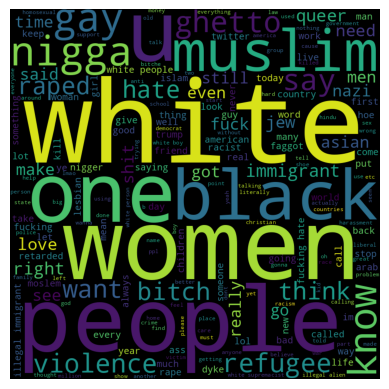

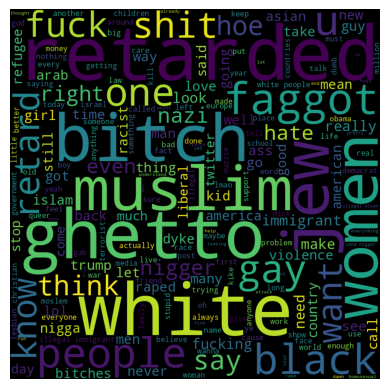

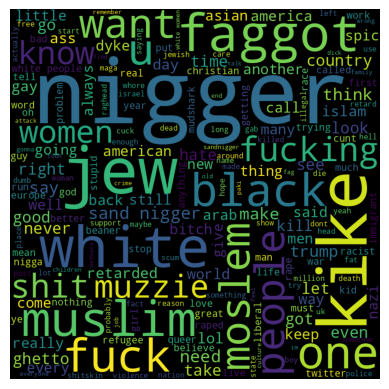

In [125]:
def draw_wc(label):
    text = ""
    for comment in df[df['label'] == label]['comment']:
        text += comment + " "
    wc = WordCloud(width=800, height=800, background_color="black").generate(text)
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

draw_wc("normal")
draw_wc("offensive")
draw_wc("hatespeech")

In [126]:
X_train, X_test, y_train, y_test = train_test_split(df["comment"], df["label"], test_size=0.25)

In [127]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=0.05)

tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

rf = RandomForestClassifier(random_state = 127, n_jobs=-1)
rf.fit(tfidf_train, y_train)
pred = rf.predict(tfidf_test)

print(classification_report(y_test,pred))
print()
print(confusion_matrix(y_test,pred))
print()
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

  hatespeech       0.79      0.24      0.37      1630
      normal       0.41      0.95      0.58      1927
   offensive       0.29      0.02      0.04      1471

    accuracy                           0.45      5028
   macro avg       0.50      0.40      0.33      5028
weighted avg       0.50      0.45      0.35      5028


[[ 389 1212   29]
 [  52 1827   48]
 [  54 1385   32]]

0.44709626093874305
